In [2]:
from keras.datasets import mnist 

#Now loets our mnist dataset

(x_train,y_train) , (x_test,y_test)=mnist.load_data()

#mow lets explore our dataset a little bit

print(y_train.shape)#it tell us the label rows of our train 


Using TensorFlow backend.


(60000,)


In [3]:
#Lets explore our dataset a bit more

print("Initial shape of dimensions of x train",str(x_train.shape))
print("Number of samples in out training data : ",str(len(x_train)))
print("Number of label in our training data: ",str(len(y_train)))
print("Number of samples in our test data : ",str(len(x_test)))
print("Number of label in our test_data : ",str(len(y_test)))
print()
print("Dimension of x_train" + str(x_train[0].shape))
print("Label of x_train" + str(y_train.shape))
print()
print("Dimensions of x_test" + str(x_train[0].shape))
print("Label of y_test" + str(y_test.shape))


Initial shape of dimensions of x train (60000, 28, 28)
Number of samples in out training data :  60000
Number of label in our training data:  60000
Number of samples in our test data :  10000
Number of label in our test_data :  10000

Dimension of x_train(28, 28)
Label of x_train(60000,)

Dimensions of x_test(28, 28)
Label of y_test(10000,)


In [4]:
#Now lets take a look at some of images of our dataset
#It will show 6 random images from our dataset
import cv2
import numpy as np

for i in range(0,6):
    random_num = np.random.randint(0,len(x_train))
    img= x_train[random_num]
    window_num =  str('Random Sample # '+ str[i])
    cv2.imshow(window_num,img)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

TypeError: 'type' object is not subscriptable

In F:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In F:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In F:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In F:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In F:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

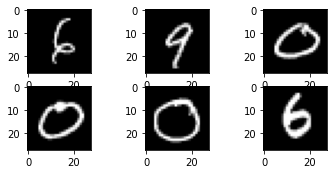

In [5]:
#We can even plot it using matplotlib

import matplotlib.pyplot as plt
import numpy as np
plt.subplot(331)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.show()

In [6]:
#Now lets prepare our datset for training

img_rows=x_train[0].shape[0]

img_cols=x_train[1].shape[0]
print(img_cols)

#Getting our date in the right 'shape' needed for keras
#We need to add a 4th dimesion to our data thereby changing our
#Our original image of (60000,28,28) to (60000,28,28,1)
#where 1 i color encoding ie grayscale

x_train =  x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test =  x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

#Share the shape of a single image

input_shape=(img_rows,img_cols,1)

#change our unput shape to a single image
x_train= x_train.astype('float32')
x_test=x_test.astype('float32')

#Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train/=255
x_test/=255

print('x_train shape',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

28
x_train shape (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
#Now lets do one hot encoding on our labels
from keras.utils import np_utils
y_train =  np_utils.to_categorical(y_train)
y_test =  np_utils.to_categorical(y_test)

print("Number of classes : "+ str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] + x_train.shape[2]

Number of classes : 10


In [8]:
#Now lets build our model
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

#create model
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])

print(model.summary())#will give the hidden layer and summary of our neural network/

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [9]:
batch_size=32
epochs=10

history=model.fit(x_train,
                  y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(x_test,y_test))

score=model.evaluate(x_test,y_test,verbose=0)
print("Test loss: ",score[0])
print("Test accuracy : ",score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 54s 895us/step - loss: 0.6872 - accuracy: 0.7883 - val_loss: 0.2471 - val_accuracy: 0.9294
Epoch 2/10
60000/60000 [==============================] - 54s 894us/step - loss: 0.3568 - accuracy: 0.8922 - val_loss: 0.1870 - val_accuracy: 0.9448
Epoch 3/10
60000/60000 [==============================] - 57s 946us/step - loss: 0.2983 - accuracy: 0.9101 - val_loss: 0.1555 - val_accuracy: 0.9553
Epoch 4/10
60000/60000 [==============================] - 55s 922us/step - loss: 0.2694 - accuracy: 0.9209 - val_loss: 0.1375 - val_accuracy: 0.9593
Epoch 5/10
60000/60000 [==============================] - 52s 874us/step - loss: 0.2414 - accuracy: 0.9269 - val_loss: 0.1251 - val_accuracy: 0.9641
Epoch 6/10
60000/60000 [==============================] - 52s 872us/step - loss: 0.2245 - accuracy: 0.9330 - val_loss: 0.1140 - val_accuracy: 0.9663
Epoch 7/10
60000/60000 [==============================] 

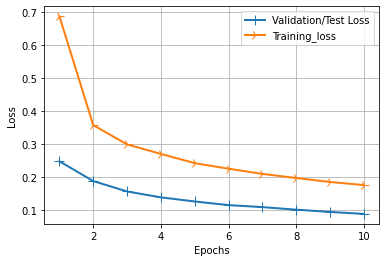

In [10]:
#Now lets plot our loss and accuracy charts

import matplotlib.pyplot as plt

history_dict=history.history

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs = range(1,len(loss_values)+1)

line1 = plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2 = plt.plot(epochs,loss_values,label='Training_loss')

plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-11-e1c83e143431>, line 2)

In [13]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [20]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
classifier = model_from_json(loaded_model_json)
# load weights into new model
classifier.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [27]:
#Now lets input some of our test data into our classifier

import cv2
import numpy as np
def draw(name,pred,input_in):
    BLACK=[0,0,0]
    expanded_image=cv2.copyMakeBorder(input_in,0,0,0,imageL.shape[0],cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image=cv2.cvtColor(expanded_image,cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image,str(pred),(152,70),cv2.FONT_HERSHEY_COMPLEX_SMALL,4,(0,255,0),2)
    cv2.imshow(name,expanded_image)
    
for i in range(0,10):
    rand=np.random.randint(0,len(x_test))
    input_in=x_test[rand]
    
    imageL=cv2.resize(input_in,None,fx=4,fy=4,interpolation=cv2.INTER_CUBIC)
    input_in=input_in.reshape([1,28,28,1])
    
    res=str(classifier.predict_classes(input_in,1,verbose=0)[0])
    
    draw('Prediction',res,imageL)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()